


# Decision Trees


    

## Objectives



* Develop a classification model using Decision Tree Algorithm to solve the business problem of company A

**Business Problem:**
In the healthcare industry, determining the most effective medication for patients is a complex task that often involves trial and error. Misdiagnoses or incorrect drug prescriptions can lead to adverse reactions, prolonged recovery, and increased healthcare costs. The challenge lies in efficiently matching patients with the right medication based on their historical data, such as medical conditions, demographics, and responses to previous treatments.

Personalized medicine has the potential to significantly enhance treatment outcomes by ensuring that each patient receives the most effective medication based on their individual profile. By improving the accuracy and speed of prescribing the right medication, healthcare providers can enhance patient care, reduce side effects, and decrease costs associated with ineffective treatments. The ability to predict a patient’s response to medication based on historical data is a critical step in advancing personalized healthcare solutions.

**Solution Approach:**
In this notebook, we will explore how to use a Decision Tree algorithm—a widely used machine learning method for classification tasks—to solve this problem. The process involves several key steps:
1.	Data Collection & Preprocessing:
We begin with historical patient data, which includes various features such as age, gender, medical history, and previous responses to medications. The data will be cleaned and preprocessed, handling missing values, encoding categorical variables, and normalizing numerical features to prepare it for training the model.
2.	Building the Decision Tree Model:
Decision Trees are powerful models that recursively split data based on feature values to make predictions. We will use this algorithm to classify patients according to their response to different medications. The model will learn from past cases to make decisions about which medication is likely to be effective for new patients based on their data.
3.	Model Training & Evaluation:
Once the decision tree is constructed, we will split the data into training and testing sets. The training set will allow the model to learn patterns in the data, while the testing set will evaluate its predictive accuracy. We will assess the model’s performance using metrics like accuracy, precision, and recall to ensure it provides reliable predictions.

4.	Prediction & Personalization:
After the model is trained and validated, we will use it to predict the most appropriate medication for an unknown patient. By inputting the new patient’s data into the decision tree, the model will classify their response to various medications, enabling healthcare providers to make informed decisions about their treatment plans.

By implementing this Decision Tree algorithm, healthcare professionals can leverage historical patient data to predict drug efficacy, ultimately improving patient care and minimizing the risks associated with incorrect prescriptions. This approach not only enhances the personalization of treatments but also aids in optimizing healthcare outcomes in an efficient manne

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#downloading_data">Downloading the Data</a></li>
        <li><a href="#pre-processing">Pre-processing</a></li>
        <li><a href="#setting_up_tree">Setting up the Decision Tree</a></li>
        <li><a href="#modeling">Modeling</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#visualization">Visualization</a></li>
    </ol>
</div>
<br>
<hr>


In [59]:
%pip install scikit-learn
%pip install gdown
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


First, I just import the Following Libraries:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>


In [66]:

import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import gdown

<div id="about_dataset">
    <h2>About the dataset</h2>
    In this case, I am a medical researcher compiling data for a study. I have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of five medications: Drug A, Drug B, Drug C, Drug X, and Drug Y.
    <br>
    <br>
    Part of my job is to build a model to determine which drug might be appropriate for a future patient with the same illness. The features of this dataset include Age, Sex, Blood Pressure, and Cholesterol levels of the patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    This dataset is a sample for a multiclass classification task. I will use the training part of the dataset to build a decision tree, and then use it to predict the class of an unknown patient or prescribe a drug to a new patient.
</div>

<div id="downloading_data"> 
    <h2>Downloading the Data</h2>
    To download the data, we will use !wget to download it from IBM Object Storage.
</div>


In [67]:
# download file from goole drive
file_id = '1VKpDiXxErZtcWmgTEVsNPg5xMlBQr0oV'
url = f'https://drive.google.com/uc?id={file_id}'
path = "../../datasets/drug200.csv"

gdown.download(url,path, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1VKpDiXxErZtcWmgTEVsNPg5xMlBQr0oV
To: /Users/mushroomchoo/github/MLclassic/datasets/drug200.csv
100%|██████████| 5.83k/5.83k [00:00<00:00, 13.7MB/s]


'../../datasets/drug200.csv'

Now, read the data using pandas dataframe:


In [68]:
my_data = pd.read_csv(path, delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [46]:
# Ckeck data size

my_data.shape


(200, 6)

<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>


Remove the column containing the target name since it doesn't contain numeric values.


In [71]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]


array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

Some features in this dataset are categorical, such as __Sex__ or __BP__. Unfortunately, Sklearn Decision Trees does not handle categorical variables. So I will convert these features to numerical values using __LabelEncoder__
to convert the categorical variable into numerical variables.


In [ ]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 



le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 





In [79]:
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [78]:
print("categories after sorting:", le_sex.classes_)
print("recoding results:", le_sex.transform(['F','M']))

categories after sorting: ['F' 'M']
recoding results: [0 1]


**Note:**
The sorting rules of LabelEncoder are based on lexicographical order:
1. Characters are compared one by one:
	- The first character of each string is compared.
	- If the first characters are the same, the second character is compared, and so on until a difference is found.
2.	Numbers are treated as strings:
	- Numeric values like '1', '10', and '2' are compared as strings, not as integers. For example:
	- '10' comes before '2' because '1' is smaller than '2'.
3.	Special symbols:
	- Symbols are included in sorting based on their Unicode values.
	- Commonly, symbols like !, $, and % come before digits and letters.
4.	Shorter strings are prioritized:
	- If one string is a prefix of another, the shorter string comes first. For example:
	- 'app' comes before 'apple'.
5.	Case sensitivity:
	- If strings have both uppercase and lowercase letters, uppercase letters are sorted before lowercase letters because uppercase letters have lower Unicode values.

Now we can fill the target variable.


In [49]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>


In [50]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.


In [51]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

<h3>Practice</h3>
Print the shape of X_trainset and y_trainset. Ensure that the dimensions match.


In [52]:
# your code
for data_set in [X_trainset, y_trainset]:
    print(data_set.shape)


print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

(140, 5)
(140,)
Shape of X training set (140, 5) &  Size of Y training set (140,)


Print the shape of X_testset and y_testset. Ensure that the dimensions match.


In [53]:
# your code

for data_set in [X_testset , y_testset]:
    print(data_set.shape)

(60, 5)
(60,)


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [54]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>


In [55]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [56]:
predTree = drugTree.predict(X_testset)

We can also can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the predictions to the actual values.


In [57]:
print (predTree [0:5])
print (y_testset [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>


In [61]:
from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


__Accuracy classification score__ computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


<hr>

<div id="visualization">
    <h2>Visualization</h2>
    
    
Let's visualize the tree
</div>


In [64]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

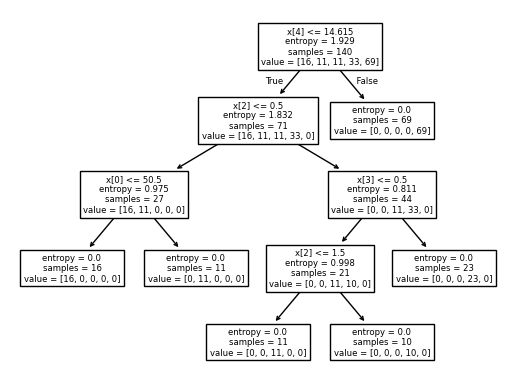

In [65]:
import matplotlib.pyplot as plt

tree.plot_tree(drugTree)
plt.show()